This material is adapted from a "data cleaning seminar" by [Christine Zhang](https://twitter.com/christinezhang)


## Tools

We will use the `tidyverse` package, particularly tools from `{dplyr}` and `{stringr}`


In [1]:
library(tidyverse)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data Source

The Employee Earnings Report is one of the interesting datasets that the City of Boston makes available through their [Open Data portal](https://data.boston.gov/). It gives payroll data for every person on the municipal payroll. It is where the Boston Globe gets stories like these every year:

- "64 City of Boston workers earn more than $250,000" ([February 6, 2016](https://www.bostonglobe.com/metro/2016/02/05/city-boston-workers-earn-more-than/MvW6RExJZimdrTlwdwUI7M/story.html))

- "Police detective tops Boston’s payroll with a total of over $403,000" ([February 14, 2017](https://www.bostonglobe.com/metro/2017/02/14/police-detective-tops-boston-payroll-with-total-over/6PaXwTAHZGEW5djgwCJuTI/story.html))


Get the data using the `read.csv()` function


In [12]:
salary <- read.csv("https://data.boston.gov/dataset/418983dc-7cae-42bb-88e4-d56f5adcf869/resource/8368bd3d-3633-4927-8355-2a2f9811ab4f/download/employee-earnings-report-2016.csv")



Inspect the dataset:



In [15]:
salary |> head()



,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN.EDUCATION.INCENTIVE,TOTAL.EARNINGS,POSTAL
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,"Abadi,Kidani A",Assessing Department,Property Officer,"$46,291.98",,$300.00,,,,,"$46,591.98",02118
2,"Abasciano,Joseph",Boston Police Department,Police Officer,"$6,933.66",,$850.00,$205.92,"$74,331.86",,"$15,258.44","$97,579.88",02132
3,"Abban,Christopher John",Boston Fire Department,Fire Fighter,"$103,442.22",,$550.00,"$15,884.53",,"$4,746.50",,"$124,623.25",02132
4,"Abbasi,Sophia",Green Academy,Manager (C) (non-ac),"$18,249.83",,,,,,,"$18,249.83",02148
5,"Abbate-Vaughn,Jorgelina",BPS Ellis Elementary,Teacher,"$84,410.28",,"$1,250.00",,,,,"$85,660.28",02481
6,"Abberton,James P",Public Works Department,Maint Mech (Carpenter)##,"$41,449.16",,$81.00,"$8,807.47",,,,"$50,337.63",02127


There are a lot of columns. Let us simplify by selecting the ones of interest: `NAME`, `DEPARTMENT_NAME`, and `TOTAL.EARNINGS`. We can do this using the `select()` function in `dplyr`. We will save them into a new data frame, `salary_set`.



In [72]:
salary_set <- salary %>%
    select("NAME", "DEPARTMENT_NAME", "TITLE","OVERTIME","TOTAL.EARNINGS")


salary_set |> head()

,NAME,DEPARTMENT_NAME,TITLE,OVERTIME,TOTAL.EARNINGS
,<chr>,<chr>,<chr>,<chr>,<chr>
1,"Abadi,Kidani A",Assessing Department,Property Officer,,"$46,591.98"
2,"Abasciano,Joseph",Boston Police Department,Police Officer,$205.92,"$97,579.88"
3,"Abban,Christopher John",Boston Fire Department,Fire Fighter,"$15,884.53","$124,623.25"
4,"Abbasi,Sophia",Green Academy,Manager (C) (non-ac),,"$18,249.83"
5,"Abbate-Vaughn,Jorgelina",BPS Ellis Elementary,Teacher,,"$85,660.28"
6,"Abberton,James P",Public Works Department,Maint Mech (Carpenter)##,"$8,807.47","$50,337.63"


We can also change these names to lowercase names for easier typing using `tolower()`:



In [73]:
names(salary_set) <- tolower(names(salary_set)) 
    


Print the first 6 rows of the dataset:



In [74]:

salary_set |> head(6)


,name,department_name,title,overtime,total.earnings
,<chr>,<chr>,<chr>,<chr>,<chr>
1,"Abadi,Kidani A",Assessing Department,Property Officer,,"$46,591.98"
2,"Abasciano,Joseph",Boston Police Department,Police Officer,$205.92,"$97,579.88"
3,"Abban,Christopher John",Boston Fire Department,Fire Fighter,"$15,884.53","$124,623.25"
4,"Abbasi,Sophia",Green Academy,Manager (C) (non-ac),,"$18,249.83"
5,"Abbate-Vaughn,Jorgelina",BPS Ellis Elementary,Teacher,,"$85,660.28"
6,"Abberton,James P",Public Works Department,Maint Mech (Carpenter)##,"$8,807.47","$50,337.63"


Sort the data by `total.earnings` using the `arrange()`



In [75]:
salary_set |> 
    arrange(desc(total.earnings)) |> 
    head(6)



,name,department_name,title,overtime,total.earnings
,<chr>,<chr>,<chr>,<chr>,<chr>
1,"Kassa,Selamawit",BPS Substitute Teachers/Nurs,Substitute Teacher,,$990.64
2,"Nixon,Chloe",BPS Substitute Teachers/Nurs,Substitute Teacher,,$990.64
3,"Wiggins,Lucas A",BPS Substitute Teachers/Nurs,Substitute Teacher,,$990.63
4,"Bradshaw,John E.",BPS Substitute Teachers/Nurs,Substitute Teacher HE,,$990.62
5,"McGrath,Caitlin",BPS Substitute Teachers/Nurs,Substitute Teacher,,$990.61
6,"Zhang,Julia",BPS Substitute Teachers/Nurs,Substitute Teacher,,$990.61


Inspect:



In [68]:

class(salary_set$total.earnings) 


[1] "character"

_What went wrong?_

The problem is that there are non-numeric characters, `,` and `$`, in the `total.earnings` column. Check the type of the `total.earnings` attribute:


In [69]:

class(salary_set$total.earnings) 


[1] "character"

We need to find the `,` and `$` in `total.earnings` and remove them (pattern matching and replacement). The `str_replace()` function in the `stringr` package lets us do this easily.



In [76]:

salary_set$total.earnings <- str_replace_all(salary_set$total.earnings, "\\$", "")
salary_set$total.earnings <- str_replace_all(salary_set$total.earnings, ",", "")
salary_set$overtime <- str_replace_all(salary_set$overtime, "\\$", "")
salary_set$overtime <- str_replace_all(salary_set$overtime, ",", "")
salary_set$total.earnings <- as.numeric(salary_set$total.earnings)

salary_set |> head(6)


,name,department_name,title,overtime,total.earnings
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,"Abadi,Kidani A",Assessing Department,Property Officer,,46591.98
2,"Abasciano,Joseph",Boston Police Department,Police Officer,205.92,97579.88
3,"Abban,Christopher John",Boston Fire Department,Fire Fighter,15884.53,124623.25
4,"Abbasi,Sophia",Green Academy,Manager (C) (non-ac),,18249.83
5,"Abbate-Vaughn,Jorgelina",BPS Ellis Elementary,Teacher,,85660.28
6,"Abberton,James P",Public Works Department,Maint Mech (Carpenter)##,8807.47,50337.63


The dollar sign `$` is trickier. Let us try doing the exact same thing, except let's set `pattern = '$'` instead of `pattern = ','`:



In [77]:

salary_set |> 
    arrange(desc(total.earnings)) |> 
    head(6)


,name,department_name,title,overtime,total.earnings
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,"Lee,Waiman",Boston Police Department,Police Detective,58600.49,403408.6
2,"Josey,Windell C.",Boston Police Department,Police Detective,89610.71,396348.5
3,"Painten,Paul A",Boston Police Department,Police Detective,82482.12,373959.3
4,"Brown,Gregory",Boston Police Department,Police Detective,87511.88,351825.5
5,"Hosein,Haseeb",Boston Police Department,Police Captain/DDC,50719.02,346105.2
6,"Kervin,Timothy M.",Boston Police Department,Police Lieutenant/Hdq Dispatch,87167.66,343818.2


In [83]:

avg_officer_earnings <- salary_set |> 
    filter(grepl("police", title, ignore.case = TRUE)) |>
    group_by(title) |>
    summarise(avg_earnings = mean(total.earnings)) |> 
    arrange(desc(avg_earnings))

avg_officer_earnings |> View()


title,avg_earnings
<chr>,<dbl>
Police Sergeant/Hdq Dispatcher,290398.540
Police Lieutenant/Hdq Dispatch,283031.333
Police Lieut/Paid Detail Ser,279348.120
Police Captain,267909.210
Police Captain-DDC/HRCD,266890.600
Police Lieut (Det),253332.240
Police Captain/DDC,251699.349
Police Captain (Det),243248.753
Police Sergeant/Bomb Squad,232847.785


`$` is known as a "special character" or "metacharacter", along with `*` `+` `.` `?` `[` `]` `^` `{` `}` `|` `(` `)` `\`. 

If we want R to literally find a dollar sign, `$`, we can add two backslashes before the dollar sign: `\\$`, which lets R know to ignore or "escape" the special attributes of `$` on its own.


Inspect again:



Now can we use `arrange()` to sort the data by `total.earnings`?



What's the problem? Again, we can use the `class()` function to check on how the `total.earnings` variable is encoded.



It's a "character" now (still not numeric). Use `as.numeric()` to coerce that column as numeric:



Sort again:



The Boston Police Department has a lot of high earners. We can figure out the average earnings by department, which we'll call `ave_earnings`, by using the `group_by()` and `summarise()` functions in `dplyr`.



In [46]:

avg_earnings <- salary_set |> 
    group_by(department_name) |> 
    summarise(avg_earnings = mean(total.earnings)) |> 
    arrange(desc(avg_earnings))

avg_earnings |> head(6)

department_name,avg_earnings
<chr>,<dbl>
Asst Superintendent-Network A,132514.9
Superintendent,126056.9
Boston Police Department,124787.2
Boston Fire Department,122797.4
Chief Operating Officer,117485.5
Strategy Department,102616.7


Check 



Check the Boston Police Department average



## Merging Datasets

Now we have two main datasets, `salary_sort` (the salary for each person, sorted from high to low) and `salary_ave` (the average salary for each department). What if I wanted to merge these two together, so I could see side-by-side each person's salary compared to the average for their department?


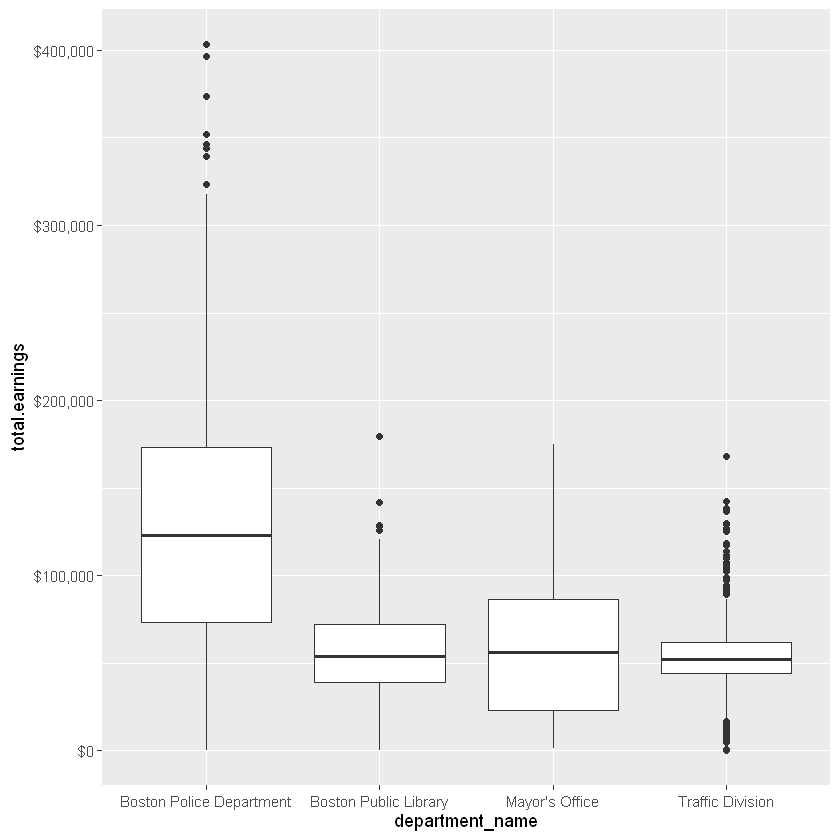

In [51]:

salary_set |>
    filter(department_name %in% c("Boston Police Department", "Boston Public Library", "Mayor's Office", "Traffic Division")) |>
    ggplot() + 
    geom_boxplot(aes(x = department_name, y = total.earnings)) +
    scale_y_continuous(labels = scales::dollar) 


## Exercise 1 (75 points)

Create a side-by-side plot that compares the salaries of those working for the Boston Police Department, the Boston Public Library, the Mayor's Office, and the Traffic Division.


Hint: 

- Generate the dataframe that has the department names of interest
- Use the `geom_boxplot()` function with the appropriate aesthetics to compare the salaries of those working in the different departments. 


In [ ]:
# possible solution



## Exercise 2 (25 points)

For each of the departments studied in the previous exercise, find the employees with the top 5 salaries.


In [ ]:
# possible solution

